<a href="https://colab.research.google.com/github/rubencg195/ML_Course_6915/blob/master/Assignment_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #3 - Machine Learning

1. Run Random Forest
2. Return Importance Feature Rank
3. Filter Data based on Importance
4. Perform Cross Validation Based on Training Data (KNN, LDA, Random Forst)
5. Generate AUPRC and ROC Curves
6. Predict Class Probability for Test Instances

In [0]:
import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plt

# Upload Data

In [3]:
!git clone https://github.com/rubencg195/ML_Course_6915

Cloning into 'ML_Course_6915'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [0]:
root = "ML_Course_6915/"
train_filename = root+"A3_training_dataset.tsv"
test_filename  = root+"A3_test_dataset.tsv"

In [0]:
train_df = pd.read_csv(train_filename, sep='\t', header=None)
test_df  = pd.read_csv(test_filename, sep='\t', header=None)

In [6]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,-46.8,-24,1000,-118,0,0,0,0.025862,0.017241,0.000000,...,0.025862,0.025862,0.025862,0.034483,0.017241,0.025862,0.000000,0.043103,0.025862,1
1,-28.5,-15,845,-80,0,7,0,0.017391,0.043478,0.008696,...,0.008696,0.008696,0.008696,0.026087,0.008696,0.000000,0.008696,0.000000,0.000000,1
2,-92.1,-96,0,-42,1,209,1,0.027701,0.002770,0.008310,...,0.005540,0.047091,0.011080,0.016620,0.008310,0.019391,0.005540,0.013850,0.002770,1
3,-61.1,-107,1000,-306,0,68,1,0.049587,0.008264,0.020661,...,0.004132,0.041322,0.004132,0.008264,0.008264,0.004132,0.008264,0.012397,0.004132,1
4,-21.1,-76,0,-86,1,281,1,0.047619,0.023810,0.000000,...,0.047619,0.023810,0.035714,0.000000,0.000000,0.011905,0.023810,0.011905,0.023810,1


In [7]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,-41.60,-1000,1000,0,1,0,1,0.000000,0.000000,0.007692,...,0.030769,0.000000,0.000000,0.015385,0.023077,0.061538,0.015385,0.007692,0.069231,0.023077
1,-137.87,-1000,469,0,1,0,1,0.000000,0.000000,0.005479,...,0.035616,0.008219,0.016438,0.024658,0.038356,0.032877,0.027397,0.019178,0.057534,0.019178
2,-61.40,-1000,1000,0,1,0,1,0.011173,0.000000,0.005587,...,0.033520,0.016760,0.027933,0.022346,0.005587,0.027933,0.016760,0.005587,0.100559,0.011173
3,-33.10,-1000,1000,0,0,0,0,0.000000,0.000000,0.000000,...,0.031746,0.000000,0.023810,0.000000,0.047619,0.063492,0.015873,0.000000,0.103175,0.023810
4,-190.40,-102,1000,0,1,0,1,0.000000,0.007335,0.002445,...,0.029340,0.012225,0.007335,0.034230,0.046455,0.029340,0.007335,0.022005,0.070905,0.007335


# Filter By Importance

In [0]:
train_y = train_df.values[:,  -1]
train_x = train_df.values[:, :-1]

In [9]:
from sklearn.feature_selection import VarianceThreshold
# Remove all the columns which have constant values. 
# These columns have zero std deviation.
variance_threshold = 0.00015
selector           = VarianceThreshold(variance_threshold)
train_x            = selector.fit_transform(train_x)

print("Train Data Reduced to {} Based on the Variance Threshold {}".format(train_x.shape, variance_threshold ))

Train Data Reduced to (3817, 58) Based on the Variance Threshold 0.00015


<Figure size 576x396 with 0 Axes>

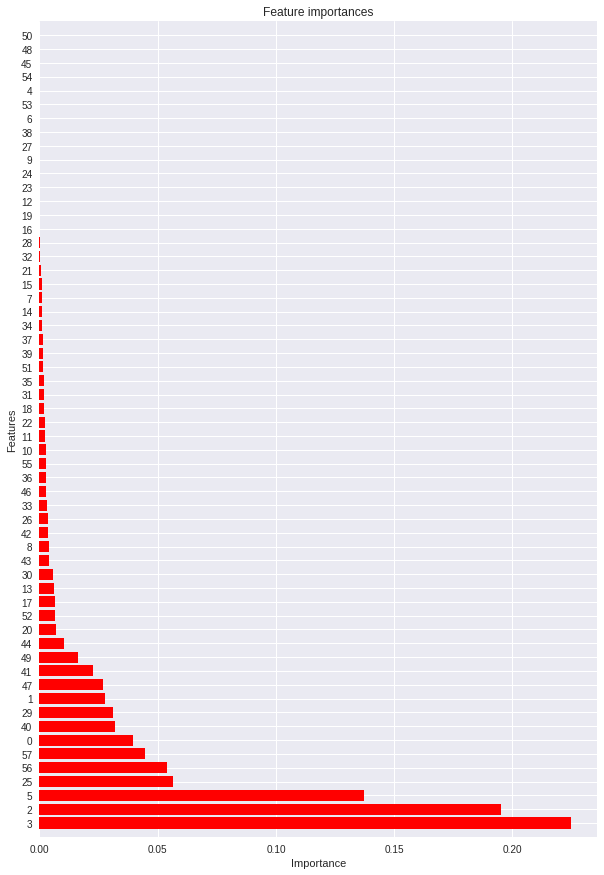

In [10]:
#Feature importance Ranking
from sklearn.ensemble import RandomForestClassifier
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=100, 
                                max_depth=2,
                                random_state=0)
forest.fit(train_x, train_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.figure(figsize=(10,15))
plt.title("Feature importances")
plt.barh(range(train_x.shape[1]), importances[indices],
       color="r", align="center")
plt.yticks(range(train_x.shape[1]), indices)
plt.ylim([-1, train_x.shape[1]])
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()

In [11]:
# Print the feature ranking
feature_ranking = pd.DataFrame()
feature_ranking.index.name
# print("Feature ranking:")
for f in range(train_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 3 (0.224708)
2. feature 2 (0.195217)
3. feature 5 (0.137143)
4. feature 25 (0.056388)
5. feature 56 (0.053802)
6. feature 57 (0.044466)
7. feature 0 (0.039691)
8. feature 40 (0.032020)
9. feature 29 (0.031168)
10. feature 1 (0.027802)
11. feature 47 (0.027005)
12. feature 41 (0.022518)
13. feature 49 (0.016312)
14. feature 44 (0.010582)
15. feature 20 (0.006935)
16. feature 52 (0.006635)
17. feature 17 (0.006366)
18. feature 13 (0.006264)
19. feature 30 (0.005587)
20. feature 43 (0.003924)
21. feature 8 (0.003858)
22. feature 42 (0.003800)
23. feature 26 (0.003767)
24. feature 33 (0.003052)
25. feature 46 (0.002881)
26. feature 36 (0.002831)
27. feature 55 (0.002783)
28. feature 10 (0.002558)
29. feature 11 (0.002300)
30. feature 22 (0.002184)
31. feature 18 (0.001994)
32. feature 31 (0.001822)
33. feature 35 (0.001723)
34. feature 51 (0.001538)
35. feature 39 (0.001435)
36. feature 37 (0.001420)
37. feature 34 (0.001242)
38. feature 14 (0.001028)
39. feature 7 (0.000955)
40

In [12]:
#Filter by importance
importance_threshold = 0.0002
train_x = train_x[: , importances > importance_threshold ]
print("Train Data Reduced to {} Based on Importance".format(train_x.shape ))

Train Data Reduced to (3817, 43) Based on Importance


# KNN

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(31,41))
#weight_options = ["uniform", "distance"]
# param_grid = dict(n_neighbors = k_range, weights = weight_options)

param_grid = dict(n_neighbors = k_range)
knn = KNeighborsClassifier()

grid = GridSearchCV(
    knn, 
    param_grid, 
    cv = 10, 
    iid=False,
#     scoring = ["average_precision", 'accuracy', 'roc_auc' ],
    scoring = ['average_precision','precision', 'recall'],
    refit = 'average_precision',
    #     scoring = 'average_precision',
)
grid.fit(train_x,train_y)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.5081216686088716
{'n_neighbors': 38}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=38, p=2,
           weights='uniform')


[0.50038134 0.49571228 0.49913759 0.50584219 0.50087042 0.50483327
 0.50735206 0.50812167 0.5076334  0.50656042] 

 [0.30663866 0.29806723 0.31815126 0.30957983 0.3210084  0.31243697
 0.32109244 0.31243697 0.31815126 0.31235294]


(0.0, 1.0)

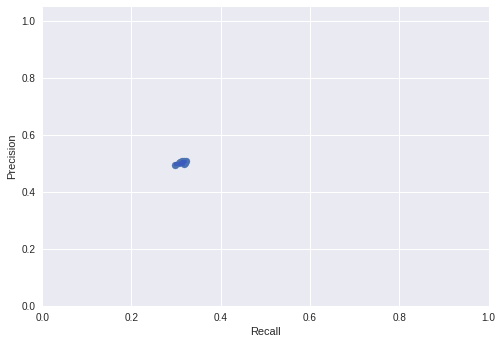

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision = grid.cv_results_['mean_test_average_precision']
recall    = grid.cv_results_['mean_test_recall']
print(precision,'\n\n', recall)
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
# plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.scatter(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#           average_precision))             

In [18]:
sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_average_precision',
 'mean_test_precision',
 'mean_test_recall',
 'mean_train_average_precision',
 'mean_train_precision',
 'mean_train_recall',
 'param_n_neighbors',
 'params',
 'rank_test_average_precision',
 'rank_test_precision',
 'rank_test_recall',
 'split0_test_average_precision',
 'split0_test_precision',
 'split0_test_recall',
 'split0_train_average_precision',
 'split0_train_precision',
 'split0_train_recall',
 'split1_test_average_precision',
 'split1_test_precision',
 'split1_test_recall',
 'split1_train_average_precision',
 'split1_train_precision',
 'split1_train_recall',
 'split2_test_average_precision',
 'split2_test_precision',
 'split2_test_recall',
 'split2_train_average_precision',
 'split2_train_precision',
 'split2_train_recall',
 'split3_test_average_precision',
 'split3_test_precision',
 'split3_test_recall',
 'split3_train_average_precision',
 'split3_train_precision',
 'split3_train_recall',
 'split4_test_avera

In [19]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
np.warnings.filterwarnings('ignore')

ave_precision = np.array([])
ave_recall    = np.array([])
counter       = 0
kf            = KFold(n_splits=10)

for train_index, test_index in kf.split(train_x):
  #print("Fold:", couter); counter += 1
  X_train, X_test = train_x[train_index], train_x[test_index]
  y_train, y_test = train_y[train_index], train_y[test_index]
  
  predict_proba        = grid.predict_proba(X_test)
  y_score              = predict_proba[:, 1]
  precision, recall, _ = precision_recall_curve(y_test, y_score)
  ave_precision        = np.concatenate((ave_precision, precision), axis=0)
  ave_recall           = np.concatenate((ave_precision, recall), axis=0)
  

  average_precision    = average_precision_score(y_test, y_score)
  print(average_precision, X_test.shape, y_test.shape)

ave_precision.shape
#for i in range(10):
#  print("Pre ", len(ave_precision[i]), " Rec ", len(ave_recall[i]))

0.992338872420365 (382, 43) (382,)
nan (382, 43) (382,)
nan (382, 43) (382,)
nan (382, 43) (382,)
nan (382, 43) (382,)
nan (382, 43) (382,)
nan (382, 43) (382,)
nan (381, 43) (381,)
nan (381, 43) (381,)
nan (381, 43) (381,)


(53,)

In [0]:
#sorted(grid.scorer_.keys()) #SVM choose c and kernel

In [0]:
predict_proba = grid.predict_proba(train_x)
y_score = predict_proba[:, 1]

Average precision-recall score: 0.54
[0.39473684 0.05263158 0.71052632 ... 0.86842105 0.         0.02631579]
[1. 1. 1. ... 0. 0. 0.]


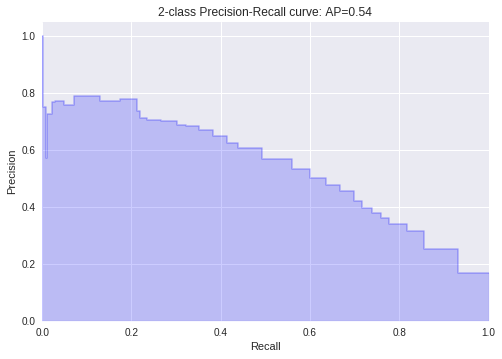

In [21]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(train_y, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(train_y, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))             

print(y_score)
print(train_y)

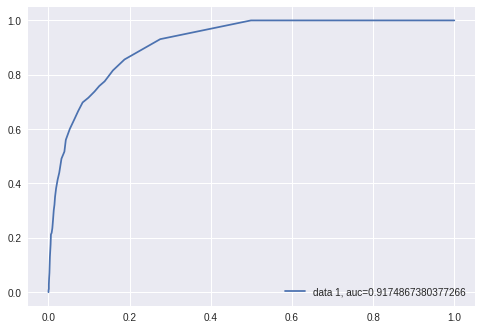

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(train_y,  y_score)
auc         = roc_auc_score(train_y,  y_score)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM

In [0]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ["rbf", "linear"]
    param_grid = {'C': Cs, 'gamma' : gammas, "kernel" : kernels }
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
  
svc_param_selection(train_x, train_y, 10)